<a href="https://colab.research.google.com/github/PAastha/-Accenture_Virtual_Internship-/blob/main/Accenture_North_America%2CNAVIGATING_NUMBERS_Bring_data_to_life_with_analytics_%26_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
#all the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
#read the csv as dataframe
content=pd.read_csv("/content/Content.csv")
reaction_types=pd.read_csv("/content/ReactionTypes.csv")
reactions=pd.read_csv("/content/Reactions.csv")

EXPLORE CONTENT

In [222]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [223]:
#handling missing values
import pandas as pd

for column in content.columns:
    if content[column].isna().any():
        print(f"{column} has missing data. Total missing values: {content[column].isna().sum()}")
    else:
        print(f"{column} does not have missing data.")


Unnamed: 0 does not have missing data.
Content ID does not have missing data.
User ID does not have missing data.
Type does not have missing data.
Category does not have missing data.
URL has missing data. Total missing values: 199


In [224]:
#remove the rows with missing values
content=content.dropna(subset=["URL"])


In [225]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    int64 
 1   Content ID  801 non-null    object
 2   User ID     801 non-null    object
 3   Type        801 non-null    object
 4   Category    801 non-null    object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.8+ KB


In [226]:
#handle columns that are relevant and irrelevant
#drop the unnamed:0, uderid,url columns,content id
#remove the rows with missing values
content=content.drop(columns=["Unnamed: 0","User ID","URL"])

In [227]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [228]:
#handling dtatypes
columns=["Type","Category"]
for column in columns:
  print(f"unique values in:{column}:{content[column].value_counts()}")

unique values in:Type:photo    211
video    209
GIF      191
audio    190
Name: Type, dtype: int64
unique values in:Category:travel             60
science            55
fitness            54
animals            54
culture            54
technology         54
tennis             53
cooking            51
healthy eating     50
dogs               49
education          48
soccer             47
food               47
veganism           43
studying           41
public speaking    40
Studying            1
Name: Category, dtype: int64


In [229]:

content['Category'] = content['Category'].replace('studying', 'Studying')

In [230]:
"""from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in columns:
    content[col] = label_encoder.fit_transform(content[col])"""

'from sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\nfor col in columns:\n    content[col] = label_encoder.fit_transform(content[col])'

In [231]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  801 non-null    object
 1   Type        801 non-null    object
 2   Category    801 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


Now we have content dataframe ready

In [232]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [233]:
#handling missing values
import pandas as pd

for column in reactions.columns:
    if reactions[column].isna().any():
        print(f"{column} has missing data. Total missing values: {reactions[column].isna().sum()}")
    else:
        print(f"{column} does not have missing data.")


Unnamed: 0 does not have missing data.
Content ID does not have missing data.
User ID has missing data. Total missing values: 3019
Type has missing data. Total missing values: 980
Datetime does not have missing data.


In [234]:
#remove the rows with missing values
reactions=reactions.dropna(subset=["Type","User ID"])


In [235]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22534 non-null  int64 
 1   Content ID  22534 non-null  object
 2   User ID     22534 non-null  object
 3   Type        22534 non-null  object
 4   Datetime    22534 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [236]:
#handle columns that are relevant and irrelevant
#drop the unnamed: o, user id
#remove the rows with missing values
reactions=reactions.drop(columns=["Unnamed: 0","User ID"])

In [237]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  22534 non-null  object
 1   Type        22534 non-null  object
 2   Datetime    22534 non-null  object
dtypes: object(3)
memory usage: 704.2+ KB


In [238]:
#handling dtatypes
columns=["Type"]
for column in columns:
  print(f"unique values in:{column}:{reactions[column].value_counts()}")

unique values in:Type:heart          1497
peeking        1438
scared         1436
adore          1427
interested     1425
hate           1420
love           1411
disgust        1406
dislike        1396
want           1396
super love     1393
like           1391
indifferent    1385
cherish        1380
worried        1379
intrigued      1354
Name: Type, dtype: int64


In [239]:
#hande the datatype
"""reactions["Type"]=label_encoder.fit_transform(reactions["Type"])"""


'reactions["Type"]=label_encoder.fit_transform(reactions["Type"])'

In [240]:
#change datatype
reactions["Datetime"]=pd.to_datetime(reactions["Datetime"])

In [241]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  22534 non-null  object        
 1   Type        22534 non-null  object        
 2   Datetime    22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


We are done with reactions dataframe


In [242]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [243]:
#remove unwanted columns
reaction_types=reaction_types.drop(columns=["Unnamed: 0"])

In [244]:
#handling dtatypes
columns=["Type","Sentiment"]
for column in columns:
  print(f"unique values in:{column}:{reaction_types[column].value_counts()}")

unique values in:Type:heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: Type, dtype: int64
unique values in:Sentiment:positive    9
negative    5
neutral     2
Name: Sentiment, dtype: int64


In [245]:
"""
for col in columns:

    reaction_types[col] = label_encoder.fit_transform(reaction_types[col])"""

'\nfor col in columns:\n\n    reaction_types[col] = label_encoder.fit_transform(reaction_types[col])'

In [246]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


MERGING DATASET

In [247]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [248]:
reactions.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [249]:

merged_df = pd.merge(content, reactions, on=["Content ID"], how='inner')
merged_df

,Content ID,Type_x,Category,Type_y,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58
...,...,...,...,...,...
18379,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-10-31 04:50:14
18380,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,dislike,2020-06-27 09:46:48
18381,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-02-16 17:17:02
18382,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-11-04 20:08:31


In [250]:

merged_df.rename(columns={'Type_y': 'Type'}, inplace=True)

print(merged_df)


                                 Content ID Type_x    Category        Type  \
0      97522e57-d9ab-4bd6-97bf-c24d952602d2  photo    Studying     disgust   
1      97522e57-d9ab-4bd6-97bf-c24d952602d2  photo    Studying     dislike   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2  photo    Studying      scared   
3      97522e57-d9ab-4bd6-97bf-c24d952602d2  photo    Studying     disgust   
4      97522e57-d9ab-4bd6-97bf-c24d952602d2  photo    Studying  interested   
...                                     ...    ...         ...         ...   
18379  75d6b589-7fae-4a6d-b0d0-752845150e56  audio  technology     worried   
18380  75d6b589-7fae-4a6d-b0d0-752845150e56  audio  technology     dislike   
18381  75d6b589-7fae-4a6d-b0d0-752845150e56  audio  technology   intrigued   
18382  75d6b589-7fae-4a6d-b0d0-752845150e56  audio  technology     worried   
18383  75d6b589-7fae-4a6d-b0d0-752845150e56  audio  technology     cherish   

                 Datetime  
0     2020-11-07 09:43:50  
1     2

In [251]:
#now merge with reactions types
final_merge = pd.merge(merged_df, reaction_types, on=["Type"], how='inner')
final_merge

,Content ID,Type_x,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
18379,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-10-04 22:26:33,positive,72
18380,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-09-18 10:50:50,positive,72
18381,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-10-31 03:58:44,positive,72
18382,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-06-25 15:12:29,positive,72


In [252]:
##get top 5 category summing each category score


grouped = final_merge.groupby('Category')['Score'].sum()
print(grouped)
# Sorting the grouped data by sum and getting the top 5 categories
top_categories = grouped.sort_values(ascending=False).head(5)
print(top_categories)



Category
Studying           35861
animals            52443
cooking            49681
culture            47710
dogs               41816
education          45103
fitness            41829
food               47576
healthy eating     52745
public speaking    37730
science            53657
soccer             42031
technology         46683
tennis             43612
travel             53935
veganism           38513
Name: Score, dtype: int64
Category
travel            53935
science           53657
healthy eating    52745
animals           52443
cooking           49681
Name: Score, dtype: int64


In [253]:
#final dataset with top 5 category info
filtered_df = final_merge[final_merge['Category'].isin(top_categories.index)]
print(filtered_df)



                                 Content ID Type_x        Category     Type  \
3      9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo  healthy eating  disgust   
4      230c4e4d-70c3-461d-b42c-ec09396efb3f  photo  healthy eating  disgust   
34     bda0b065-7f8b-4d52-b7e9-fcc375cdab08  photo          travel  disgust   
35     bda0b065-7f8b-4d52-b7e9-fcc375cdab08  photo          travel  disgust   
37     34a3747a-0b77-42f6-ae19-87c38b94b674    GIF         science  disgust   
...                                     ...    ...             ...      ...   
18367  89cb4504-fccd-40f4-945e-410f74ee4735  photo         animals    adore   
18368  89cb4504-fccd-40f4-945e-410f74ee4735  photo         animals    adore   
18369  89cb4504-fccd-40f4-945e-410f74ee4735  photo         animals    adore   
18375  c54b49c4-b1f2-4641-8595-1cbd19937845  photo         science    adore   
18376  c54b49c4-b1f2-4641-8595-1cbd19937845  photo         science    adore   

                 Datetime Sentiment  Score  
3     

In [256]:
filtered_df.to_csv('filtered_data.csv', index=False)
print("Filtered data saved to 'filtered_data.csv'")


Filtered data saved to 'filtered_data.csv'


In [260]:
#EDA
final_merge["Category"].value_counts().sort_values(ascending=False).head(5)

travel            1368
science           1351
animals           1323
healthy eating    1303
cooking           1277
Name: Category, dtype: int64

In [266]:
#EDA
final_merge["Type_x"].value_counts().sort_values(ascending=False).head(5)

photo    5006
video    4637
GIF      4465
audio    4276
Name: Type_x, dtype: int64

Datetime
2021-01-07 14:49:14    2
2020-10-29 20:51:08    2
2021-01-17 02:19:26    2
2020-08-10 18:01:52    2
2020-11-01 00:05:07    2
Name: Content ID, dtype: int64

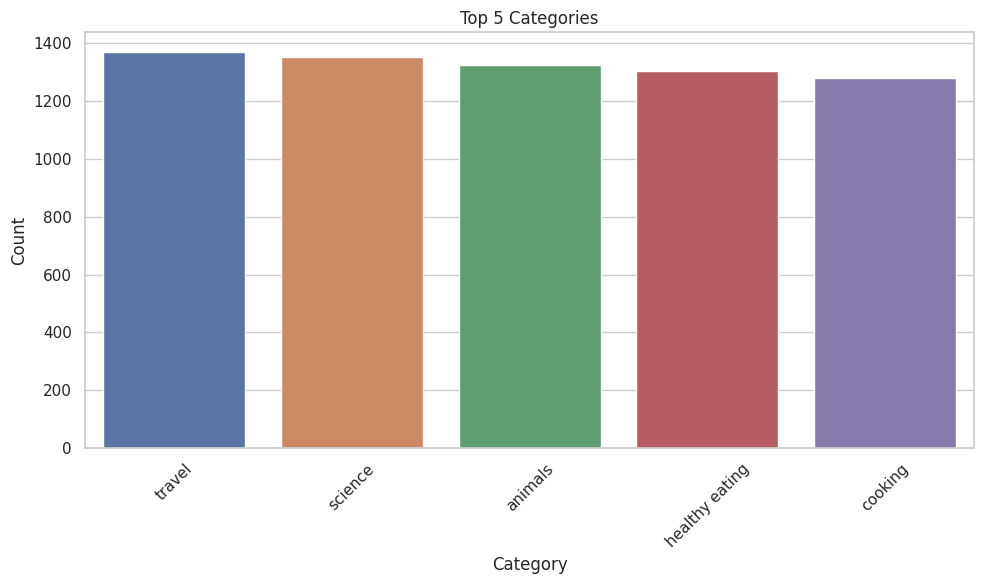

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_merge is your DataFrame
top_categories = final_merge["Category"].value_counts().sort_values(ascending=False).head(5)

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categories.index, y=top_categories.values)
ax.set_title('Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

plt.show()


In [276]:

final_merge['Month'] = final_merge['Datetime'].dt.month

# Calculate the counts of posts per month
most_posts_month = final_merge['Month'].value_counts().idxmax()


print("The month with the most posts is:", most_posts_month)


The month with the most posts is: 8


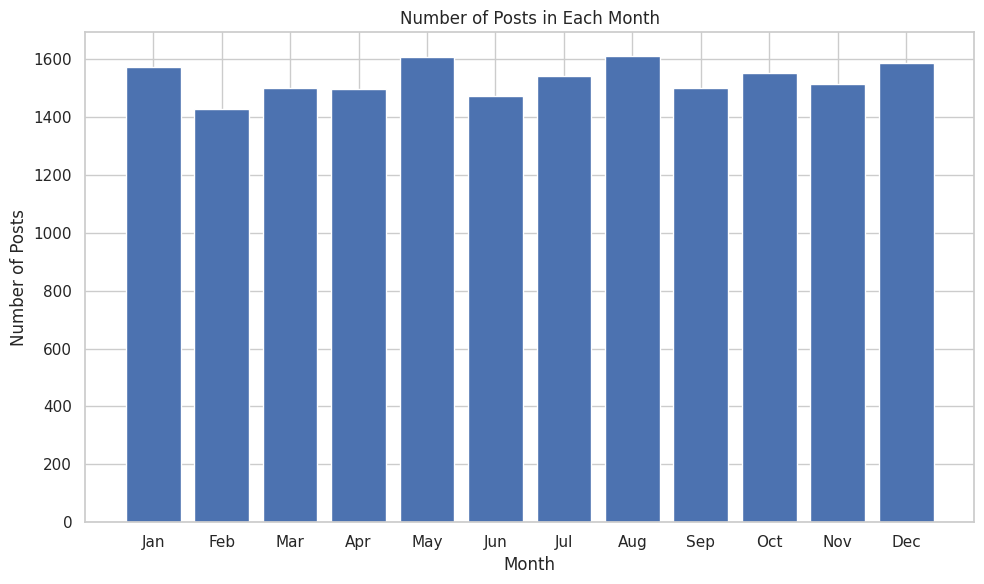

In [277]:
final_merge['Month'] = final_merge['Datetime'].dt.month

# Calculate the counts of posts per month
posts_per_month = final_merge['Month'].value_counts().sort_index()

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(posts_per_month.index, posts_per_month.values)
plt.title('Number of Posts in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

plt.show()
